In [334]:
#import all the necessary libraries

%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
#from scipy.stats import linregress
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})
import os #install statsmodels
os.system('pip install statsmodels')
import statsmodels.api as statsmodels # useful stats package with regression functions
import statsmodels.formula.api as smf


#import the data set

df = pd.read_csv('kc_house_data.csv')
print(df)
data_frame = pd.DataFrame(['Living Area (sqft)','Price ($ in millions)'])
price = df["Price ($ in millions)"]
living_area = df["Living Area (sqft)"]

z_scores = stats.zscore(df) #calculate z-scores of df'

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries] #eliminate the outliers that are more than three SDs away

print(new_df)
new_df.head()
new_price = new_df["Price ($ in millions)"]
new_living_area = new_df["Living Area (sqft)"]

       Price ($ in millions)  Living Area (sqft)
0                   221900.0                1180
1                   538000.0                2570
2                   180000.0                 770
3                   604000.0                1960
4                   510000.0                1680
...                      ...                 ...
21608               360000.0                1530
21609               400000.0                2310
21610               402101.0                1020
21611               400000.0                1600
21612               325000.0                1020

[21613 rows x 2 columns]
       Price ($ in millions)  Living Area (sqft)
0                   221900.0                1180
1                   538000.0                2570
2                   180000.0                 770
3                   604000.0                1960
4                   510000.0                1680
...                      ...                 ...
21608               360000.0               

In [335]:
new_price_mean = round(new_price.mean(),2) #round up to two digits
new_price_median = new_price.median() 
sd_new_price = round(np.std(new_price),2) #round up to two digits
new_living_area_mean = round(new_living_area.mean(),2)
new_living_area_median = new_living_area.median()
sd_new_iving_area = round(np.std(new_living_area),2)

def mode(lst): #since I have multiple modes, I created another function for mode
    L1=[] #count the occurrence of each number and append or add findings to the list
  
    i = 0 #count the numbers and put them into L1
    while i < len(lst) : 
        L1.append(lst.count(lst[i])) 
        i += 1

    # the occurrences for each number in sorted lst 
    # create a custom dictionary d1 for k : V 
    # k = value, v = occurence

    d1 = dict(zip(lst, L1))  
    d2=[k for (k,v) in d1.items() if v == max(L1)] # the k values with the highest v values. 
    return d2

print("Your # of data for price is:",len(new_price))
print("Mean for price is:", price_mean)
print("Median for price is:", price_median)
print("Mode for price is:", sorted(mode(price.to_list())))
print("Standard Deviation for price is:", sd_price)
print("Your range for price is:", max(price) - min(price))
print("######")
print("Your # of data for living_area is:",len(new_living_area))
print("Mean for living_area is:", living_area_mean)
print("Median for living_area is:", living_area_median)
print("Mode for living_area is:", sorted(mode(living_area.to_list())))
print("Standard Deviation for living_area is:", sd_living_area)
print("Your range for living_area is:", max(living_area) - min(living_area))

Your # of data for price is: 21088
Mean for price is: 503113.84
Median for price is: 445000.0
Mode for price is: [350000.0, 450000.0]
Standard Deviation for price is: 254316.45
Your range for price is: 7625000.0
######
Your # of data for living_area is: 21088
Mean for living_area is: 2012.41
Median for living_area is: 1890.0
Mode for living_area is: [1300]
Standard Deviation for living_area is: 796.14
Your range for living_area is: 13250


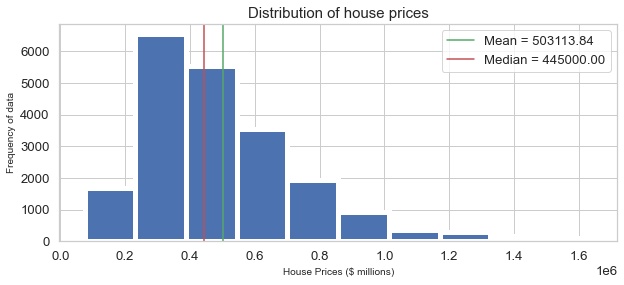

In [328]:
plt.hist(new_price, alpha=1, linewidth=5)
plt.title("Distribution of house prices", fontsize = 15)
plt.xlabel("House Prices ($ millions)", fontsize = 10)
plt.ylabel("Frequency of data", fontsize = 10)
plt.gcf().set_figwidth(10)

plt.axvline(new_price_mean, color='g', label = "Mean = 503113.84") #label legend for mean
plt.axvline(new_price_median, color='r', label = "Median = 445000.00")#label legend for median
plt.legend()
ax=plt.gca()
ax.set_facecolor('w')
plt.show()

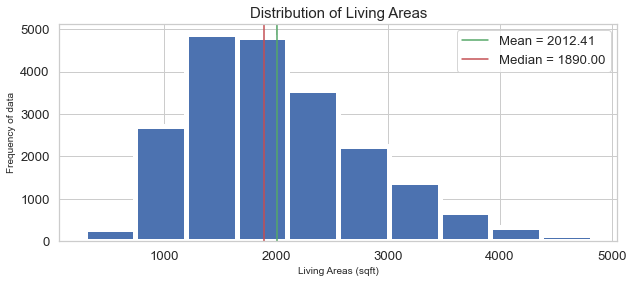

In [329]:
plt.hist(new_living_area, alpha=1, linewidth=5)
plt.title("Distribution of Living Areas", fontsize = 15)
plt.xlabel("Living Areas (sqft)", fontsize = 10)
plt.ylabel("Frequency of data", fontsize = 10)
plt.gcf().set_figwidth(10)

plt.axvline(new_living_area_mean, color='g', label = "Mean = 2012.41") #label legend for mean
plt.axvline(new_living_area_median, color='r', label = "Median = 1890.00")#label legend for median
plt.legend()
ax=plt.gca()
ax.set_facecolor('w')
plt.show()

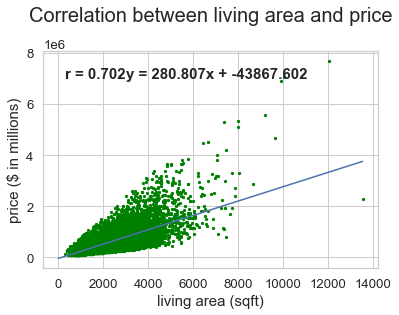

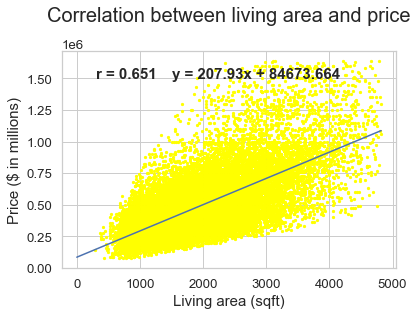

In [337]:
def scatter_plot1(x, y, title, color): #define the scatter plot function
    plt.figure()
    plt.scatter(x, y, s=5, c=color)
    plt.title(title, fontsize=20,y=1.2, pad=-14)
    plt.xlabel('living area (sqft)', fontsize=15)
    plt.ylabel('price ($ in millions)', fontsize=15)
    xmax = max(x) #get the maximum value of x
    ymax = max(y) #get the maximum value of y

    #calculation
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot([0, xmax], [intercept, slope * xmax + intercept]) #plot the equation

    # adding legend
    equation = 'y = ' + str(round(slope,3)) + 'x' + ' + ' + str(round(intercept,3))
    rvalue = 'r = ' + str(round(r_value,3))
    plt.text(3000, 7000000, equation,fontsize=15,fontweight='bold')
    plt.text(300, 7000000, rvalue,fontsize=15,fontweight='bold')
    #This python code is adpated from CS51 Session 1.2 and revised by Steven Yang.
def scatter_plot2(x, y, title, color):
    plt.figure()
    plt.scatter(x, y, s=5, c=color)
    plt.title(title, fontsize=20,y=1.2, pad=-14)
    plt.xlabel('Living area (sqft)', fontsize=15)
    plt.ylabel('Price ($ in millions)', fontsize=15)
    xmax = max(x)
    ymax = max(y)

    #calculation
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot([0, xmax], [intercept, slope * xmax + intercept])
    

    # adding legend
    equation = 'y = ' + str(round(slope,3)) + 'x' + ' + ' + str(round(intercept,3))
    rvalue = 'r = ' + str(round(r_value,3))
    plt.text(1500, 1500000, equation,fontsize=15,fontweight='bold')
    plt.text(300, 1500000, rvalue,fontsize=15,fontweight='bold')
    # second function is needed to fix the location of rvalue and equation


scatter_plot1(living_area, price, 'Correlation between living area and price', 'green')
scatter_plot2(new_living_area, new_price, 'Correlation between living area and price', 'yellow')

In [348]:
def regression_model(column_x, column_y):

    X = statsmodels.add_constant(new_df[column_x])
    Y = new_df[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #"ordinary lease squares"

    #Getting and calculating relevant values and round them up to 3 decimal points.
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    #plotting them into #dataviz
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=new_df, marker="x", ax=ax1, color = 'g', scatter_kws={"s": 0.1}) # scatter
    sns.residplot(x=column_x, y=column_y, data=new_df, ax=ax2, scatter_kws={"s": 1}) # residual
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure()
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45') #QQ plot created
    qqplot.suptitle("QQ Plot for Residuals",fontweight='bold',fontsize=14)

    #print the calculations and regression model
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)
    #This python code is adpated from CS51 Session 1.2 and session 2.2. Revised by Steven Yang'24.
    

R-squared =  0.424
Regression equation: Price ($ in millions) =  207.93 * Living Area (sqft) +  84673.664


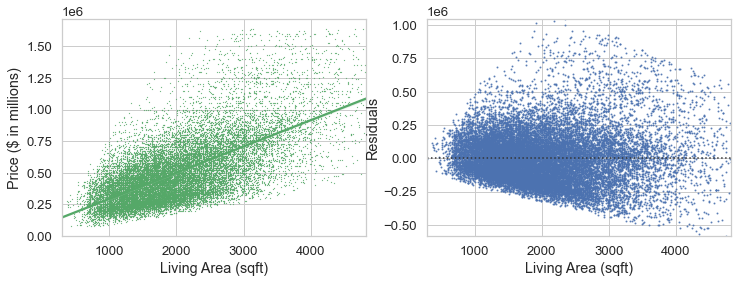

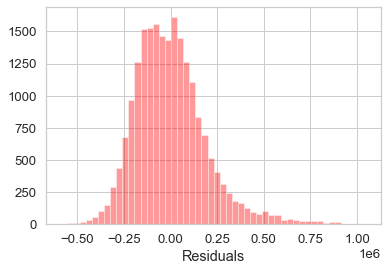

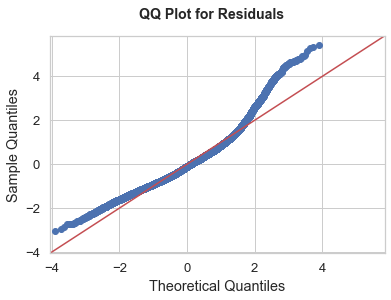

In [349]:
regression_model("Living Area (sqft)","Price ($ in millions)")

In [341]:
global regressionmodel 
regressionmodel = statsmodels.OLS(new_df['Price ($ in millions)'],statsmodels.add_constant(new_df['Living Area (sqft)'])).fit() # OLS = "ordinary least squares"
regressionmodel.summary() #print the summary of OLS Regression Results
#This python code is adpated from CS51 Session 2.2 and revised by Steven Yang.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Price ($ in millions)   R-squared:                       0.424
Model:                               OLS   Adj. R-squared:                  0.424
Method:                    Least Squares   F-statistic:                 1.550e+04
Date:                   Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                           02:43:16   Log-Likelihood:            -2.8658e+05
No. Observations:                  21088   AIC:                         5.732e+05
Df Residuals:                      21086   BIC:                         5.732e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.467e+04   3614.130     23.429      0.000    7.76e+04    9.18e+04
Living Area (sqft)   207.9297      1.670    124.510      0.000     204.656     211.203
==============================================================================
Omnibus:                     3620.236   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7849.358
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       5.203   Cond. No.                     5.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0.98, 'Normal Probability ("QQ") Plot for Residuals')

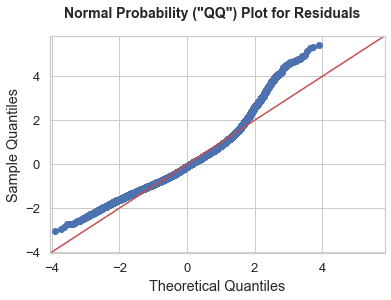

In [343]:
qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)